<a href="https://colab.research.google.com/github/pounda/soccerdetectron/blob/master/Soccer_Detectron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soccer Detectron Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">




# Install detectron2

In [0]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-3y84eflp
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-3y84eflp
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275266 sha256=45c6e486e4b88402b90b6aaa35321a8a3a5420eaeadae129dcd765c645d79867
  Stored in directory: /tmp/pip-ephem-wheel-cache-oqmgl773/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0
1.5.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free

In [0]:
# install detectron2:
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


In [0]:
#!gdown https://drive.google.com/open?id=1CPhAlWM2DUSl4fI51jaxGYyjKwmyYpoC
!gdown https://drive.google.com/uc?id=1CPhAlWM2DUSl4fI51jaxGYyjKwmyYpoC
!ls

!unzip -q /content/soccer.zip
!rm /content/soccer.zip
!mkdir '/content/output/'
#!mv soccer_zip/ output/soccer.zip

Downloading...
From: https://drive.google.com/uc?id=1CPhAlWM2DUSl4fI51jaxGYyjKwmyYpoC
To: /content/soccer.zip
1.60GB [00:15, 103MB/s] 
output	sample_data  soccer.zip
mkdir: cannot create directory ‘/content/output/’: File exists
mv: cannot stat 'soccer_zip/': No such file or directory


In [0]:
!ls

output	sample_data  soccer


# Run a pre-trained detectron2 model

**List folders**

In [0]:
!ls /content/
#!ls /content/sample_data
!ls /content/soccer/

output	sample_data  soccer
 img0001.png   img0242.png   img0483.png   img0724.png	 img0965.png
 img0002.png   img0243.png   img0484.png   img0725.png	 img0966.png
 img0003.png   img0244.png   img0485.png   img0726.png	 img0967.png
 img0004.png   img0245.png   img0486.png   img0727.png	 img0968.png
 img0005.png   img0246.png   img0487.png   img0728.png	 img0969.png
 img0006.png   img0247.png   img0488.png   img0729.png	 img0970.png
 img0007.png   img0248.png   img0489.png   img0730.png	 img0971.png
 img0008.png   img0249.png   img0490.png   img0731.png	 img0972.png
 img0009.png   img0250.png   img0491.png   img0732.png	 img0973.png
 img0010.png   img0251.png   img0492.png   img0733.png	 img0974.png
 img0011.png   img0252.png   img0493.png   img0734.png	 img0975.png
 img0012.png   img0253.png   img0494.png   img0735.png	 img0976.png
 img0013.png   img0254.png   img0495.png   img0736.png	 img0977.png
 img0014.png   img0255.png   img0496.png   img0737.png	 img0978.png
 img0015.png   img025

**Load a soccer image**


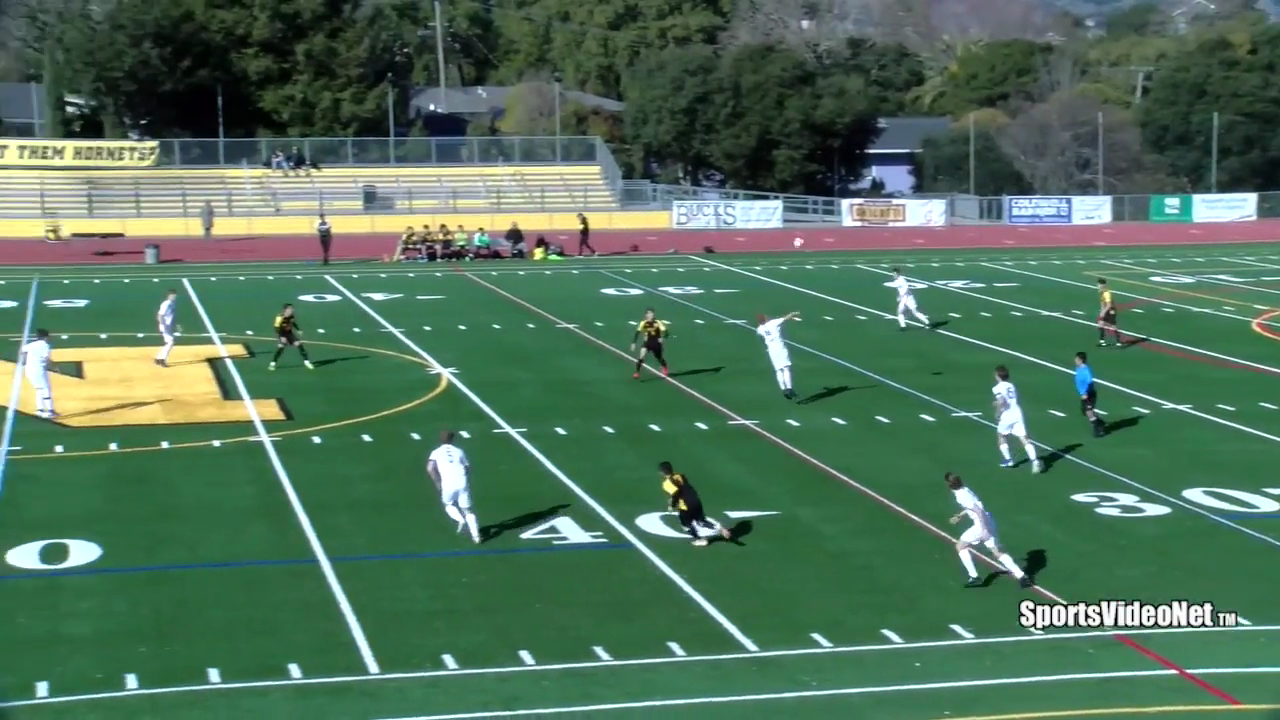

In [0]:
im = cv2.imread("/content/soccer/img1202.png")
cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [0]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:14, 12.6MB/s]                           


In [0]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[ 155.4570,  288.3399,  179.7850,  365.3015],
        [ 629.3206,  308.5457,  673.1721,  380.3161],
        [ 268.8340,  302.9859,  313.0241,  370.4606],
        [ 989.9269,  364.4586, 1037.0616,  469.9143],
        [ 943.8073,  473.0030, 1029.6602,  588.3040],
        [ 425.8085,  426.5608,  484.1669,  545.1368],
        [1094.4948,  276.6338, 1120.1696,  347.0339],
        [ 882.5897,  268.9553,  936.4348,  330.0793],
        [ 659.0460,  464.8084,  748.0833,  548.6962],
        [ 575.6547,  212.0816,  594.8373,  255.8195],
        [  16.7304,  326.5744,   60.2129,  420.4166],
        [ 315.5271,  216.2871,  334.0757,  263.7401],
        [1072.6144,  351.9218, 1108.9031,  430.7187],
        [ 311.8481,  436.3290,  321.5154,  443.5746],
        [ 752.0388,  307.9120,  801.9082,  401.4617],
        [  53.6842,  444.4370,   63.9633,  452.9809],
        [ 632.8256,  319.2693,  650.2901,  343.5815]], device='cuda:0'))

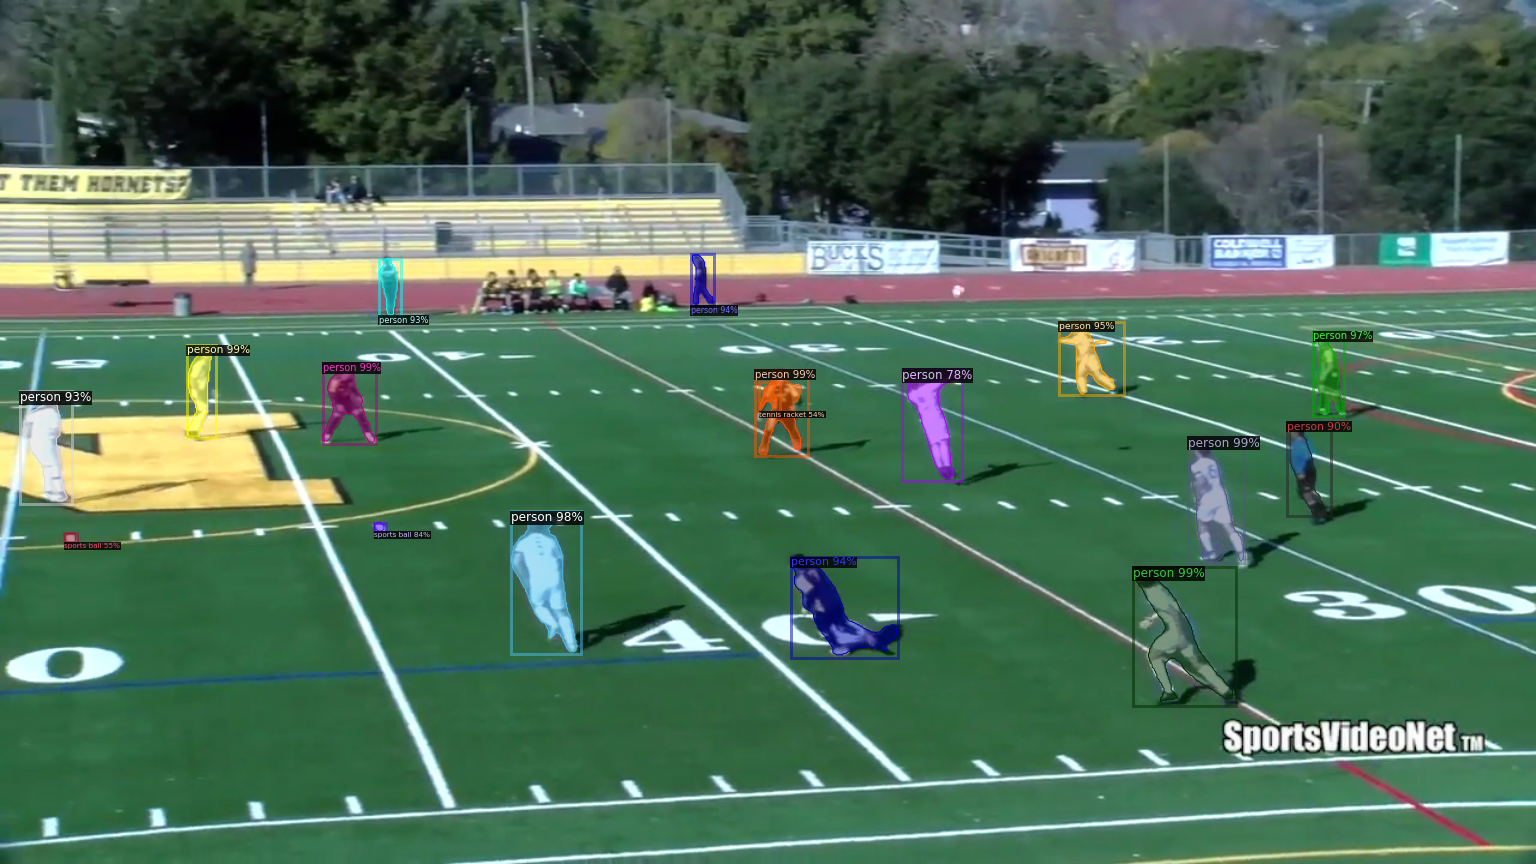

In [0]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

[155.45695 288.33994 179.78499 365.3015 ]
179.78499
179
class:
0
after
ndarray
bool
(720, 1280)
0


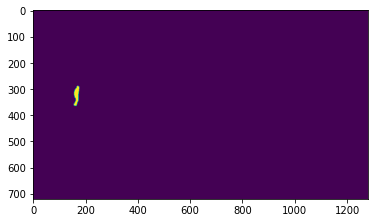

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


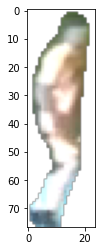

[629.32056 308.54565 673.17206 380.31613]
673.17206
673
class:
0
after
ndarray
bool
(720, 1280)
0


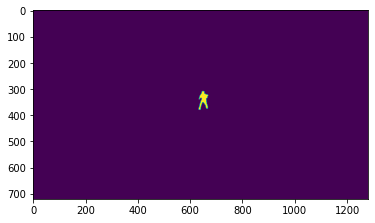

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


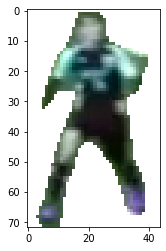

[268.83405 302.98593 313.02414 370.4606 ]
313.02414
313
class:
0
after
ndarray
bool
(720, 1280)
0


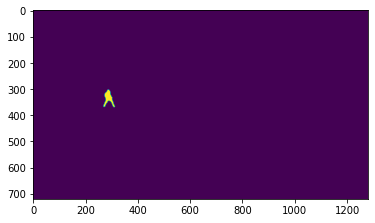

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


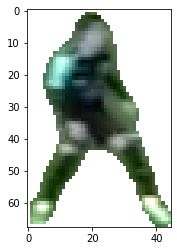

[ 989.9269   364.45862 1037.0616   469.9143 ]
1037.0616
1037
class:
0
after
ndarray
bool
(720, 1280)
0


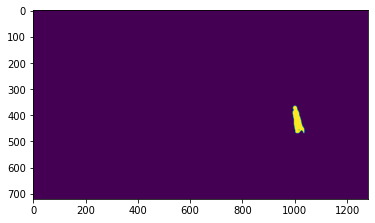

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


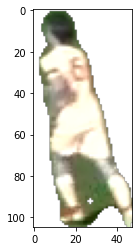

[ 943.80725  473.00302 1029.6602   588.304  ]
1029.6602
1029
class:
0
after
ndarray
bool
(720, 1280)
0


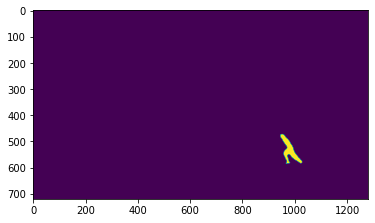

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


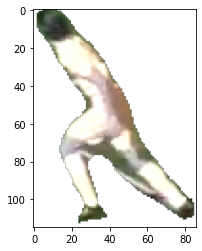

[425.80847 426.56076 484.1669  545.13684]
484.1669
484
class:
0
after
ndarray
bool
(720, 1280)
0


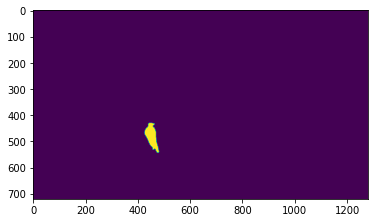

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


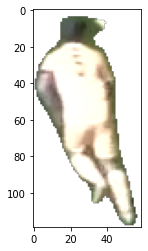

[1094.4948   276.63376 1120.1696   347.03394]
1120.1696
1120
class:
0
after
ndarray
bool
(720, 1280)
0


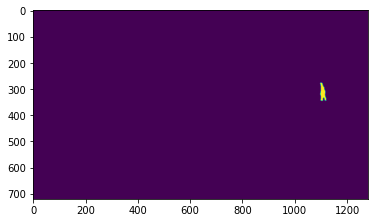

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


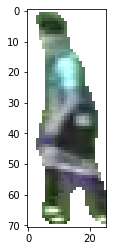

[882.58966 268.95526 936.43475 330.0793 ]
936.43475
936
class:
0
after
ndarray
bool
(720, 1280)
0


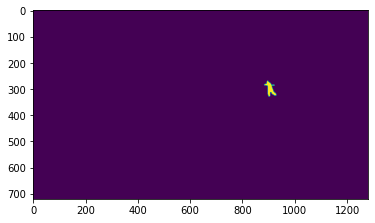

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


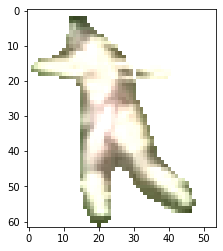

[659.04596 464.80844 748.08325 548.69617]
748.08325
748
class:
0
after
ndarray
bool
(720, 1280)
0


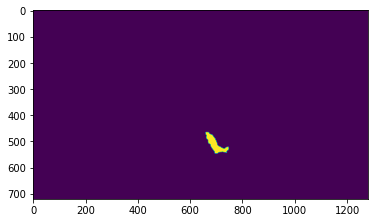

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


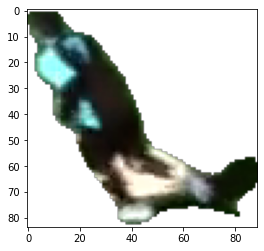

[575.6547  212.08163 594.83734 255.81952]
594.83734
594
class:
0
after
ndarray
bool
(720, 1280)
0


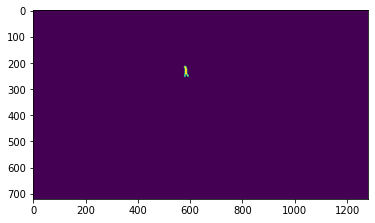

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


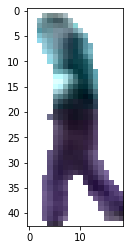

[ 16.7304   326.57443   60.212894 420.4166  ]
60.212894
60
class:
0
after
ndarray
bool
(720, 1280)
0


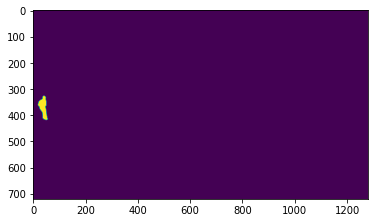

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


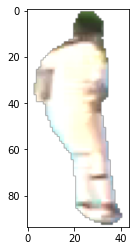

[315.5271  216.28714 334.07565 263.7401 ]
334.07565
334
class:
0
after
ndarray
bool
(720, 1280)
0


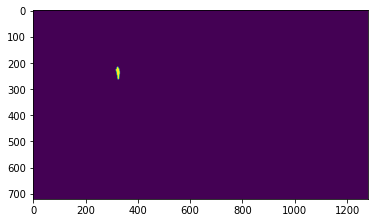

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


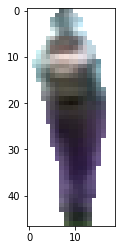

[1072.6144   351.92184 1108.9031   430.71866]
1108.9031
1108
class:
0
after
ndarray
bool
(720, 1280)
0


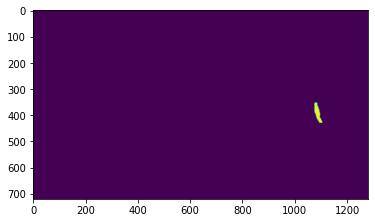

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


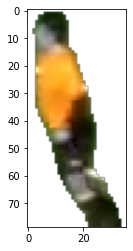

[311.84805 436.32904 321.51544 443.5746 ]
321.51544
321
class:
0
after
ndarray
bool
(720, 1280)
0


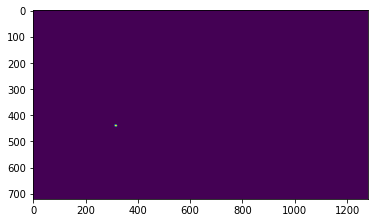

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


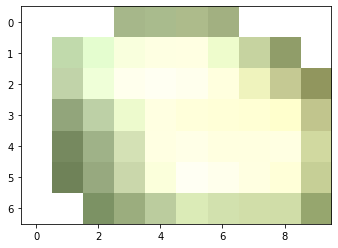

[752.03876 307.91202 801.9082  401.4617 ]
801.9082
801
class:
0
after
ndarray
bool
(720, 1280)
0


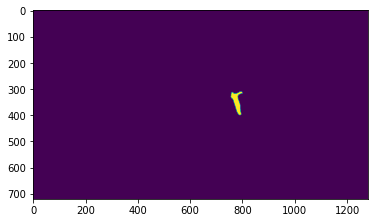

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


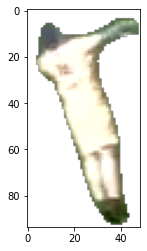

[ 53.684174 444.43695   63.96329  452.98087 ]
63.96329
63
class:
0
after
ndarray
bool
(720, 1280)
0


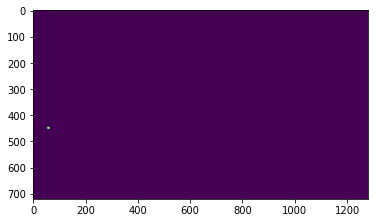

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


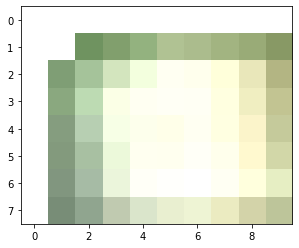

[632.8256  319.26932 650.2901  343.58154]
650.2901
650
class:
0
after
ndarray
bool
(720, 1280)
0


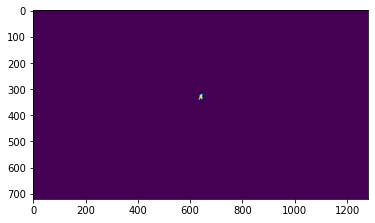

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(720, 1280)
(864, 1536, 3)
(720, 1280, 4)


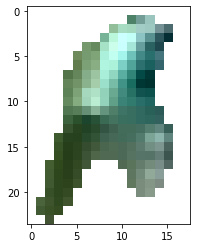

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from detectron2.structures import BitMasks, Boxes, BoxMode, PolygonMasks

masks = np.asarray(outputs["instances"].pred_masks.cpu())
classes = outputs["instances"].pred_classes.cpu()
boxes = outputs["instances"].pred_boxes.to(torch.device("cpu"))
count = 0
for m in masks:
#if True:
 #m=masks[2]
 b=boxes[count].tensor.numpy()[0]
 print(b)
 #torch.tensor(boxes[2]).to(dtype=torch.float32)
 #gt_bbox = BoxMode.convert(boxes[2], BoxMode.XYWH_ABS, BoxMode.XYXY_ABS)
 #print(gt_bbox)
 #b = boxes[2].numpy()
 #print(b)
 x = b[2]
 print(x)
 xi = int(x)
 print(xi)
 print("class:")
 print(classes[2].numpy())
 print("after")
 if isinstance(m, dict):
  print("dict")
 if isinstance(m, list):
  print("list")
 if isinstance(m, np.ndarray):
  print("ndarray")
  print(m.dtype)
  assert m.shape[1] != 2, m.shape
  print(m.shape)
  m=m*1
  _mask = m.astype(np.uint8)
  print(_mask[0][0])
  plt.imshow(_mask)
  plt.show()
  #ret, _mask = cv2.threshold(_mask, 220, 255, cv2.THRESH_BINARY_INV)
  print(_mask.dtype)
  print(_mask)
  print(_mask.shape)
  img = v.get_image()
  print(img.shape)
  #for y in _mask:
        #for x in y:
            #if x != 0:
                #print(x)
  im_alpha = cv2.cvtColor(im,cv2.COLOR_BGR2BGRA)
  new_img = cv2.bitwise_and(im_alpha, im_alpha, mask=_mask)
  print(new_img.shape)
  #plt.imshow(new_img)
  #plt.show()
  #hist_mask = cv.calcHist([im],[0],_mask,[256],[0,256])
  color = ('b','g','r')
  #for i,col in enumerate(color):
    #histr = cv2.calcHist([im],[i],_mask,[256],[0,256])
    #plt.plot(histr,color = col)
    #plt.xlim([0,256])
    #plt.show()
    #plt.imshow(im)
  #plt.show()

  cv2.imwrite('/content/output/new_img' + str(count) + '.png',new_img)
  crop_img = new_img[int(b[1]):int(b[3]), int(b[0]):int(b[2])]

  if not  cv2.imwrite('/content/output/crop_img_tp' + str(count) + '.png',crop_img):
     raise Exception("Could not write image")
  plt.imshow(crop_img)
  plt.show()
  count += 1
  
  #res = cv2.bitwise_and(img, img, mask=_mask)

0
[[134 151 164 255]
 [  0   0   0   0]
 [245 249 248 255]
 [ 95 116 113 255]
 [188 197 206 255]]


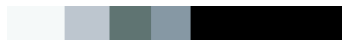

None
1
[[  0   0   0   0]
 [ 77  91  66 254]
 [195 207 171 254]
 [ 27  34  22 255]
 [136 137 114 254]]


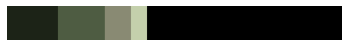

None
2
[[  0   0   0   0]
 [ 71  97  73 255]
 [137 156 129 255]
 [ 28  45  25 255]
 [210 237 192 255]]


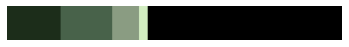

None
3
[[170 197 216 255]
 [  0   0   0   0]
 [ 61  96  85 255]
 [233 251 254 255]
 [120 145 155 255]]


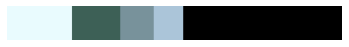

None
4
[[  0   0   0   0]
 [177 190 203 254]
 [100 124 134 254]
 [ 54  76  68 254]
 [239 250 253 255]]


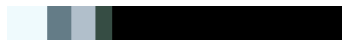

None
5
[[  0   0   0   0]
 [177 202 222 255]
 [ 72  98  97 255]
 [241 253 254 254]
 [120 145 160 255]]


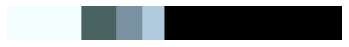

None
6
[[  0   0   0   0]
 [154 159 138 254]
 [226 231 185 254]
 [ 47  59  48 254]
 [ 96 104  88 254]]


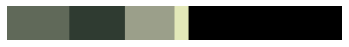

None
7
[[  0   0   0   0]
 [180 207 216 255]
 [ 81 115 113 255]
 [235 250 253 255]
 [129 160 165 255]]


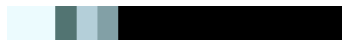

None
8
[[  0   0   0   0]
 [ 17  29  23 255]
 [226 239 215 254]
 [ 73  88  71 255]
 [150 161 140 254]]


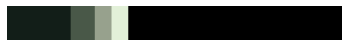

None
9
[[  0   0   0   0]
 [108  73  77 255]
 [ 62  37  37 255]
 [213 204 153 255]
 [150 135 103 255]]


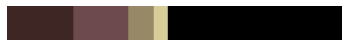

None
10
[[  0   0   0   0]
 [239 251 252 255]
 [ 55  79  74 254]
 [187 197 213 254]
 [123 135 149 255]]


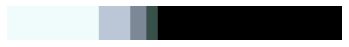

None
11
[[104  83  91 255]
 [  0   0   0   0]
 [209 205 195 255]
 [ 59  45  52 255]
 [144 141 130 255]]


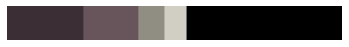

None
12
[[  0   0   0   0]
 [ 47 161 240 254]
 [ 56  94 101 254]
 [131 152 159 254]
 [ 17  40  38 254]]


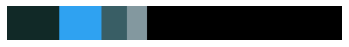

None


In [0]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    FLAT_IMAGE = None
    COLORS = None
    LABELS = None
   
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
   
    def dominantColors(self):

        img = self.IMAGE
               
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 4))
       
        #save image after operations
        self.FLAT_IMAGE = img
       
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
       
        #getting the colors as per dominance order
        self.COLORS = kmeans.cluster_centers_
       
        #save labels
        self.LABELS = kmeans.labels_
       
        return self.COLORS.astype(int)
               
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
       
        #appending frequencies to cluster centers
        colors = self.COLORS
       
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()]
       
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
       
        #creating color rectangles
        for i in range(self.CLUSTERS):
          if colors[i][3] > 1:
            end = start + hist[i] * 500
           
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
           
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end
       
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
       
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
   
    def plotClusters(self):
        #plotting
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.FLAT_IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()
       
    def colorPixels(self):
       
        shape = self.IMAGE.shape
       
        img = np.zeros((shape[0] * shape[1], 4))
        labels = self.LABELS

        for i,color in enumerate(self.COLORS):
           
            indices = np.where(labels==i)[0]
           
            for index in indices:
                img[index] = color
       
        img = img.reshape((shape[0], shape[1], 4)).astype(int)
       
        #display img
        plt.figure()
        plt.axis("off")
        plt.imshow(img)
        plt.show()


import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#print(np.__version__)

from numpy.testing import rundocs
#from dominantColors import DominantColors


for i in range(13):
    print(i)
    img = ('/content/output/crop_img_tp' + str(i) + '.png')
    img = cv2.imread(img, cv2.IMREAD_UNCHANGED)

    #convert to RGB from BGR
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)

    #no. of clusters
    clusters = 5

    #initialize using constructor
    dc = DominantColors(img, clusters)

    #print dominant colors
    colors = dc.dominantColors()
    print(colors)

    #display clustered points

    #dc.plotClusters()

    #display dominance order
    colors = dc.plotHistogram()
    print(colors)

In [0]:
!nvidia-smi

In [0]:
!ls output

crop_img_tp0.png   crop_img_tp2.png  new_img10.png  new_img3.png
crop_img_tp10.png  crop_img_tp3.png  new_img11.png  new_img4.png
crop_img_tp11.png  crop_img_tp4.png  new_img12.png  new_img5.png
crop_img_tp12.png  crop_img_tp5.png  new_img13.png  new_img6.png
crop_img_tp13.png  crop_img_tp6.png  new_img14.png  new_img7.png
crop_img_tp14.png  crop_img_tp7.png  new_img15.png  new_img8.png
crop_img_tp15.png  crop_img_tp8.png  new_img16.png  new_img9.png
crop_img_tp16.png  crop_img_tp9.png  new_img1.png
crop_img_tp1.png   new_img0.png      new_img2.png
